<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro)**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;
* реализовать веб-сервис для применения построенной модели на новых данных

> Оценка за домашку = $min(\text{ваш балл}, 11)$

**Мягкий дедлайн: 27 ноября 23:59**

**Жесткий дедлайн: 20 декабря 23:59 (конец модуля)**



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Для чего фиксируем сиды в домашках?

Параметры $\text{seed}$ фиксируем для того, чтобы установить начальное состояние генераторов. При повторном запуске кода это будет гарантировать, что случайные числа будут одинаковы.

# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [134]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [135]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [X] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [X] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [X] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [X] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла)

In [136]:
df_common = pd.concat([df_train, df_test], ignore_index=True)

In [5]:
# Колонки с пропущенными значениями
missing_cols = df_common.columns[df_common.isnull().any()].tolist()
print(f"Колонки с пропущенными значениями: {missing_cols}")

Колонки с пропущенными значениями: ['mileage', 'engine', 'max_power', 'torque', 'seats']


In [137]:
# Проверка на явные дубликаты
duplicates = df_common.duplicated().sum()
if duplicates == 0:
  print("В датасете нет явных дубликатов")
else:
  print(f"В датасете есть явные дубликаты, их кол-во = {duplicates}")

В датасете есть явные дубликаты, их кол-во = 1170


In [ ]:
pip install ydata-profiling

In [140]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_common, title="Дашборд по датасету", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Дашборд `ProfileReport` показывает:
- общую информацию о датасете: всего у нас $7999$ строк, из которых $607$ дублируются; также есть небольшой процент пропусков. Отражено разделение на типы фичей - текстовые (на самом деле просто неверно интерпретированные), числовые и категориальные.
- статистики по переменным: для категориальных фичей можно увидеть распределение по категориям и их количество; для текстовых - облако слов (по которму видно, например, что есть единицы измерения, которые стоит в дальнейшем удалить); для числовых - гистограммы распределения, по которым можно отследить наличие выбросов (например, для `km_driven`, `selling_price`).
- корреляцию общую. По матрице можно увидеть, что на необработанных данных целевая переменная наиболее прямо зависит от `year` и обратно зависит от `km_driven`.
- зависимость между числовыми признаками. Можно увидеть, что `year` и `km_driven` сильно коррелируют между собой (что также сказано в предупреждениях `Alerts`).
- предупреждения. О сильной корреляции между признаками / целевой переменной, о несбалансированности для фичи `seller_type`, о значительном кол-ве пропущенных значений для (`mileage`, `seats`, `torque`, `engine`, `max_power`).

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [X] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [X] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [X] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [141]:
# Числовые статистики
print(f"Числовые статистики трейна\n: {df_train.describe()}")
print()
print(f"Числовые статистики теста\n: {df_test.describe()}")

Числовые статистики трейна
:               year  selling_price     km_driven        seats
count  6999.000000   6.999000e+03  6.999000e+03  6797.000000
mean   2013.818403   6.395152e+05  6.958462e+04     5.419008
std       4.053095   8.089419e+05  5.772400e+04     0.965767
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.549990e+05  3.500000e+04     5.000000
50%    2015.000000   4.500000e+05  6.000000e+04     5.000000
75%    2017.000000   6.750000e+05  9.700000e+04     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

Числовые статистики теста
:               year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.3499

In [142]:
# Категориальные статистики
cat_cols = df_train.select_dtypes(include=['object']).columns

print(f"Категориальные статистики трейна\n: {df_train[cat_cols].describe()}")
print()
print()
print(f"Категориальные статистики теста\n: {df_test[cat_cols].describe()}")

Категориальные статистики трейна
:                           name    fuel seller_type transmission        owner  \
count                     6999    6999        6999         6999         6999   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       116    3793        5826         6095         4587   

          mileage   engine max_power          torque  
count        6797     6797      6803            6796  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          197      885       330             468  


Категориальные статистики теста
:                        name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 80

In [11]:
# Сравнение внутри наборов данных
print("Разница среднего и медианы внутри трейна:")
print(df_train.mean(numeric_only=True) - df_train.median(numeric_only=True))
print()
print("Разница среднего и медианы внутри теста:")
print(df_test.mean(numeric_only=True) - df_test.median(numeric_only=True))

Разница среднего и медианы внутри трейна:
year                 -1.181597
selling_price    189515.197171
km_driven          9584.615517
seats                 0.419008
dtype: float64

Разница среднего и медианы внутри теста:
year                 -0.319000
selling_price    182902.042000
km_driven          9893.341000
seats                 0.410805
dtype: float64


В обоих наборах данных среднее отклоняется от медианы. Для $\text{year}$ и $\text{seats}$ отклонение минимально, то есть распределение по ним относително равномерно. Для $\text{selling_price}$ и $\text{km_driven}$ значения среднего превосходят медиану, что говорит о правостороннем распределении (есть выборсы, которые по значение превышают остальные).

In [143]:
# Сравнение внутри наборов данных
print("Разница среднего между трейном и тестом:")
print(df_train.mean(numeric_only=True) - df_test.mean(numeric_only=True))
print()
print("Разница медианы между трейном и тестом:")
print(df_train.median(numeric_only=True) - df_test.median(numeric_only=True))

Разница среднего между трейном и тестом:
year                 0.137403
selling_price    21614.155171
km_driven        -1808.725483
seats                0.008203
dtype: float64

Разница медианы между трейном и тестом:
year                 1.0
selling_price    15001.0
km_driven        -1500.0
seats                0.0
dtype: float64


Опять же, статистики для $\text{year}$ и $\text{seats}$ отличаются незначительно. Для $\text{selling_price}$ и $\text{km_driven}$ данные отличаются, что может быть связано с различными размерами выборок трейна и теста - одна может содержать больше выбросов.

### **Задание 3 (0.2 балла)**

- [X] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.05 балла)
- [X] Отобразите такие объекты (0.05 балла)
- [X] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.05 балла)
- [X]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.05 балла)

In [144]:
train_df_opt = df_train.drop(columns=['selling_price'])
print(f"Кол-во объектов в трейне с одинаковым признаковым описанием: {train_df_opt.duplicated().sum()}")

Кол-во объектов в трейне с одинаковым признаковым описанием: 1159


In [145]:
duplicates = df_train[train_df_opt.duplicated(keep='first')]
print("Объекты с одинаковым признаковым описанием:")
duplicates

Объекты с одинаковым признаковым описанием:


name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [146]:
# Удаляем повторки с сохранением первой строки, если цены разные
df_train = df_train.drop_duplicates(subset=train_df_opt.columns, keep='first')
# Обновление индексов
df_train.reset_index(drop=True, inplace=True)
df_train

name  year  selling_price  km_driven  \
0                Maruti Swift Dzire VDI  2014         450000     145500   
1          Skoda Rapid 1.5 TDI Ambition  2014         370000     120000   
2             Hyundai i20 Sportz Diesel  2010         225000     127000   
3                Maruti Swift VXI BSIII  2007         130000     120000   
4         Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000   
...                                 ...   ...            ...        ...   
5835            Hyundai Santro Xing GLS  2008         120000     191000   
5836  Maruti Wagon R VXI BS IV with ABS  2013         260000      50000   
5837                  Hyundai i20 Magna  2013         320000     110000   
5838              Hyundai Verna CRDi SX  2007         135000     119000   
5839             Maruti Swift Dzire ZDi  2009         382000     120000   

        fuel seller_type transmission                 owner     mileage  \
0     Diesel  Individual       Manual           First Owner   23.4 kmpl   
1     Diesel  Individual       Manual          Second Owner  21.14 kmpl   
2     Diesel  Individual       Manual           First Owner   23.0 kmpl   
3     Petrol  Individual       Manual           First Owner   16.1 kmpl   
4     Petrol  Individual       Manual           First Owner  20.14 kmpl   
...      ...         ...          ...                   ...         ...   
5835  Petrol  Individual       Manual           First Owner  17.92 kmpl   
5836  Petrol  Individual       Manual          Second Owner   18.9 kmpl   
5837  Petrol  Individual       Manual           First Owner   18.5 kmpl   
5838  Diesel  Individual       Manual  Fourth & Above Owner   16.8 kmpl   
5839  Diesel  Individual       Manual           First Owner   19.3 kmpl   

       engine   max_power                     torque  seats  
0     1248 CC      74 bhp             190Nm@ 2000rpm    5.0  
1     1498 CC  103.52 bhp        250Nm@ 1500-2500rpm    5.0  
2     1396 CC      90 bhp   22.4 kgm at 1750-2750rpm    5.0  
3     1298 CC    88.2 bhp      11.5@ 4,500(kgm@ rpm)    5.0  
4     1197 CC   81.86 bhp          113.75nm@ 4000rpm    5.0  
...       ...         ...                        ...    ...  
5835  1086 CC    62.1 bhp            96.1Nm@ 3000rpm    5.0  
5836   998 CC    67.1 bhp              90Nm@ 3500rpm    5.0  
5837  1197 CC   82.85 bhp           113.7Nm@ 4000rpm    5.0  
5838  1493 CC     110 bhp  24@ 1,900-2,750(kgm@ rpm)    5.0  
5839  1248 CC    73.9 bhp             190Nm@ 2000rpm    5.0  

[5840 rows x 13 columns]

In [16]:
assert df_train.shape == (5840, 13)

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [X] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [X] Приведите тип данных к ``float``.
* [X] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

Примечание - есть странная строка в трейн, у которой в отсутствует значение, только единица измерения:

In [147]:
df_train[df_train['max_power'] == ' bhp']

name  year  selling_price  km_driven fuel seller_type  \
3586  Maruti Omni CNG  2000          80000     100000  CNG  Individual   

     transmission         owner     mileage  engine max_power torque  seats  
3586       Manual  Second Owner  10.9 km/kg  796 CC       bhp    NaN    8.0

Кажется, что это некорректное значение, так что присвоим ему пропуск.

In [148]:
# Обработка колонок с единицами измерения
def convert_to_float(value):
  if isinstance(value, str):
    if value.strip().isalpha():  # Присваиваем пропуск, если значение невалидно
      return np.nan
    return float(value.split()[0])
  return value

columns_to_convert = ['mileage', 'engine', 'max_power']

for col in columns_to_convert:
  df_train[col] = df_train[col].apply(convert_to_float)
  df_test[col] = df_test[col].apply(convert_to_float)

In [149]:
df_train[['mileage', 'engine', 'max_power']].head(5)

mileage  engine  max_power
0    23.40  1248.0      74.00
1    21.14  1498.0     103.52
2    23.00  1396.0      90.00
3    16.10  1298.0      88.20
4    20.14  1197.0      81.86

А теперь перейдем к $\text{torque}$ (спойлер - это больно). По умолчанию хотелось бы иметь столбцы $\text{torque}$ (измеряемое в Nm) и $\text{max_torque_rpm}$. У столбца нет единого формата, так, например:
- torque измеряется в kgm, а не nm: в таком случае приводим к nm посредством умножения на 9.81;
- обороты задаются не одним значением, а диапазоном или +/-: в таком случае берем правую границу;
- единицы измерения могут идти рядом со значением, могут идти в конце в скобках, а могут вообще отсутствовать;
- в качестве разделителя целой и дробной части идет иногда запятая вместо точки;
- иногда встречается слово at перед указанием значения оборотов.

In [20]:
# Это примеры запросов, выводящих строки с иным форматом

#df_train[~df_train['torque'].str.contains('rpm', case=False, na=False)].dropna(subset=['torque'])
#df_train[~df_train['torque'].str.contains('nm', case=False, na=False)].dropna(subset=['torque'])
#df_train[df_train['torque'].str.contains('/', case=False, na=False)].dropna(subset=['torque'])
#df_train[df_train['torque'].str.contains('kgm', case=False, na=False)].dropna(subset=['torque'])
#df_train[df_train['torque'].str.contains('at', case=False, na=False)].dropna(subset=['torque'])

Я приведу пример возможных вариаций `torque`:

In [150]:
data = {
    'torque': ['190 Nm @ 2000-3000', '250 Nm @ 2500', '210 / 1900', '400 Nm @ 3000 rpm', '320 Nm', '51Nm@ 4000+/-500rpm	',
               '400 Nm /2000 rpm	', '48@ 3,000+/-500(NM@ rpm)	', '11.3kgm@ 4700rpm	', '13.5@ 4,800(kgm@ rpm)	', '20.4@ 1400-3400(kgm@ rpm)',
               '22.4 kgm at 1750-2750rpm	', '11.3kgm@ 4700rpm	', '146Nm at 4800 rpm']
}

df = pd.DataFrame(data)
df

torque
0           190 Nm @ 2000-3000
1                250 Nm @ 2500
2                   210 / 1900
3            400 Nm @ 3000 rpm
4                       320 Nm
5        51Nm@ 4000+/-500rpm\t
6           400 Nm /2000 rpm\t
7   48@ 3,000+/-500(NM@ rpm)\t
8           11.3kgm@ 4700rpm\t
9      13.5@ 4,800(kgm@ rpm)\t
10   20.4@ 1400-3400(kgm@ rpm)
11  22.4 kgm at 1750-2750rpm\t
12          11.3kgm@ 4700rpm\t
13           146Nm at 4800 rpm

Я попыталась реализовать функцию, которая на основе регулярных выражений извлекает из значения `torque` требуемые `torque` и `max_torque_rpm`:

In [151]:
import re

In [152]:
def extract_torque_values(value):
  if isinstance(value, str):
    # Общая предобработка строки
    value = value.lower()
    value = value.replace(',', '')

    # Другая единица измерения kgm
    if 'kgm' in value:
      torque_value_match = re.search(r'(\d+\.?\d*)\s*kgm', value)
      if torque_value_match:
        # Преобразование по формуле в nm
        torque_value = float(torque_value_match.group(1)) * 9.81
      else:
        torque_value = np.nan
    else:
        # Единица измерения nm
        torque_value_match = re.search(r'(\d+\.?\d*)\s*nm', value)
        if torque_value_match:
          torque_value = float(torque_value_match.group(1))
        else:
          # Число без единицы измерения
          torque_value_match = re.search(r'(\d+\.?\d*)', value)
          if torque_value_match:
              torque_value = float(torque_value_match.group(1))
          else:
              torque_value = np.nan

    # Парсинг max_torque_rpm
    max_rpm = np.nan

    # Если есть диапазон через '+/-'
    plus_minus_match = re.search(r'@ (\d+)[,]*\d*\s*\+/-\s*(\d+)', value)
    if plus_minus_match:
      # Правая граница
      max_rpm = int(plus_minus_match.group(1)) + int(plus_minus_match.group(2))
    else:
      # Если формат через слеш
      slash_match = re.search(r'(\d+\.?\d*)\s*/\s*(\d+)', value)
      if slash_match:
        # Значения до и после слэша
        torque_value = float(slash_match.group(1))
        max_rpm = int(slash_match.group(2))
      else:
        # Если обычный формат с диапазоном `-`
        rpm_match = re.search(r'@ (\d+)(?:-(\d+))?\s*(?:rpm)?', value)
        if rpm_match:
          # Правая граница
          max_rpm = int(rpm_match.group(2)) if rpm_match.group(2) else int(rpm_match.group(1))
        else:
          max_rpm = np.nan

    # Обработка строки с 'at' перед rpm
    at_rpm_match = re.search(r'(\d+\.?\d*)\s*(kgm|nm)?\s*at\s*(\d+)(?:-(\d+))?\s*rpm', value)
    if at_rpm_match:
      torque_value = float(at_rpm_match.group(1)) * 9.81 if at_rpm_match.group(2) == 'kgm' else float(at_rpm_match.group(1))
      max_rpm = int(at_rpm_match.group(3)) if at_rpm_match.group(4) is None else int(at_rpm_match.group(4))

    # Отдельная обработка для шаблонов типа 13.5@ 4,800(kgm@ rpm)
    kgm_rpm_match = re.search(r'(\d+\.?\d*)\s*@\s*(\d+)\s*\((kgm|nm)@\srpm\)', value)
    if kgm_rpm_match:
      torque_value = float(kgm_rpm_match.group(1)) * 9.81 if kgm_rpm_match.group(3) == 'kgm' else float(kgm_rpm_match.group(1))
      max_rpm = int(kgm_rpm_match.group(2))

    # Диапазоны rpm
    range_rpm_match = re.search(r'(\d+)-(\d+)\s*rpm', value)
    if range_rpm_match:
      # Правая граница
      max_rpm = int(range_rpm_match.group(2))

    return torque_value, max_rpm

  return np.nan, np.nan  # Если значение не строка

In [153]:
df[['torque_value', 'max_torque_rpm']] = df['torque'].apply(lambda x: pd.Series(extract_torque_values(x)))

# Проверка результата
df

torque  torque_value  max_torque_rpm
0           190 Nm @ 2000-3000       190.000          3000.0
1                250 Nm @ 2500       250.000          2500.0
2                   210 / 1900       210.000          1900.0
3            400 Nm @ 3000 rpm       400.000          3000.0
4                       320 Nm       320.000             NaN
5        51Nm@ 4000+/-500rpm\t        51.000          4500.0
6           400 Nm /2000 rpm\t       400.000             NaN
7   48@ 3,000+/-500(NM@ rpm)\t        48.000          3500.0
8           11.3kgm@ 4700rpm\t       110.853          4700.0
9      13.5@ 4,800(kgm@ rpm)\t       132.435          4800.0
10   20.4@ 1400-3400(kgm@ rpm)           NaN          3400.0
11  22.4 kgm at 1750-2750rpm\t       219.744          2750.0
12          11.3kgm@ 4700rpm\t       110.853          4700.0
13           146Nm at 4800 rpm       146.000          4800.0

Как видим, не все варианты удалось обработать, однако большая часть шаблонов разложилась корректно. Применим функцию к столбцам датасета.

In [154]:
df_train[['torque', 'max_torque_rpm']] = df_train['torque'].apply(lambda x: pd.Series(extract_torque_values(x)))
df_test[['torque', 'max_torque_rpm']] = df_test['torque'].apply(lambda x: pd.Series(extract_torque_values(x)))

Убедимся, что изменения применились:

In [155]:
df_train.head(5)

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power   torque  \
0  Individual       Manual   First Owner    23.40  1248.0      74.00  190.000   
1  Individual       Manual  Second Owner    21.14  1498.0     103.52  250.000   
2  Individual       Manual   First Owner    23.00  1396.0      90.00  219.744   
3  Individual       Manual   First Owner    16.10  1298.0      88.20  112.815   
4  Individual       Manual   First Owner    20.14  1197.0      81.86  113.750   

   seats  max_torque_rpm  
0    5.0          2000.0  
1    5.0          2500.0  
2    5.0          2750.0  
3    5.0          4500.0  
4    5.0          4000.0

In [156]:
df_test.head(5)

name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner  mileage  engine  max_power  \
0  Diesel  Individual       Manual   First Owner     14.0  2498.0      112.0   
1  Diesel  Individual       Manual   First Owner     21.5  1497.0      108.5   
2  Petrol  Individual    Automatic   First Owner     12.9  1799.0      130.0   
3  Diesel  Individual       Manual   First Owner     25.1  1498.0       98.6   
4  Petrol  Individual       Manual  Second Owner     16.5  1172.0       65.0   

   torque  seats  max_torque_rpm  
0   260.0    7.0          2200.0  
1   260.0    5.0          2750.0  
2   172.0    5.0          4300.0  
3   200.0    5.0          1750.0  
4    96.0    5.0          3000.0

### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [X] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [X] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [X] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






**Почему стоит применять именно медиану:** медиана более устойчивый к выбросам / неравномерному распределению показатель, так как фактически разделяет данные пополам. Среднее при наличии выбросов (хвостов на графике распределения) сильно смещается.<br>
**Как правильно считать медиану для заполнения:** по тренировочным данным для train и test. Модель обучается только на тренировочных данных, то есть тестовые данные она не знает, а значит применять статистики, вычисленные на них, фактически равно утечке информации.

In [157]:
# Вычисление медианы для train набора
num_cols = df_train.select_dtypes(include=['number']).columns
medians = df_train[num_cols].median()
df_train[num_cols] = df_train[num_cols].fillna(medians)
df_test[num_cols] = df_test[num_cols].fillna(medians)

In [158]:
# Проверяем, что не осталось пропусков
missing_cols = df_train.columns[df_train.isnull().any()].tolist()
print(f"Колонки с пропущенными значениями в train: {missing_cols}")

missing_cols = df_test.columns[df_test.isnull().any()].tolist()
print(f"Колонки с пропущенными значениями в test: {missing_cols}")

Колонки с пропущенными значениями в train: []
Колонки с пропущенными значениями в test: []


### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [X] Осуществите приведение столбцов к необходимому типу.
- [X] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [159]:
df_train['engine'] = df_train['engine'].apply(int)
df_test['engine'] = df_test['engine'].apply(int)

df_train['seats'] = df_train['seats'].apply(int)
df_test['seats'] = df_test['seats'].apply(int)

Признак `seats` обозначает кол-во мест в автомобиле и принимает ограниченное кол-во целочисленных значений (от 2 до 14), которые можно воспринимать как категории; они представляют собой дискретные группы, а не непрерывный диапазон. Этот признак - скорее характеристика автомобиля, которая не имеет смысла в контексте математических операций.

### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [X] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [31]:
print(f"Числовые статистики трейна\n: {df_train.describe()}")
print()
print(f"Числовые статистики теста\n: {df_test.describe()}")

Числовые статистики трейна
:               year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   174.326841     5.426712     3045.789041  
std      31.640418   106.823721     0.982344      912.025713  
min       0.000000    47.

Пропуски присутствовали только в столбцах, которые исходно были неверного типа, а после мы преобразовали их в числовые типы. Поэтому как-то сравнивать результаты с заданием 1.2 некорректно (+ там еще не было очистки от дубликатов). В целом, заполнение пропусков в нашем случае явно повлияет на взаимосвязь между столбцами (в том числе, с целевой переменной).<br>
Если в целом рассматривать вопрос того, могло ли заполнение пропусков сдвинуть распределение: **да, может.** Если в данных много пропусков, добавление одинаковых значений может сгладить распределение и уменьшить его дисперсию. В нашем случае, процент пропущенных значений не более $3\%$, поэтому скорее всего, значимого изменения распределения не случилось (особенно учитывая тот факт, что медиана относительно устойчива к выбросам).

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [X] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [X] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [X] Постройте pairplot по тестовым данным
- [X] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

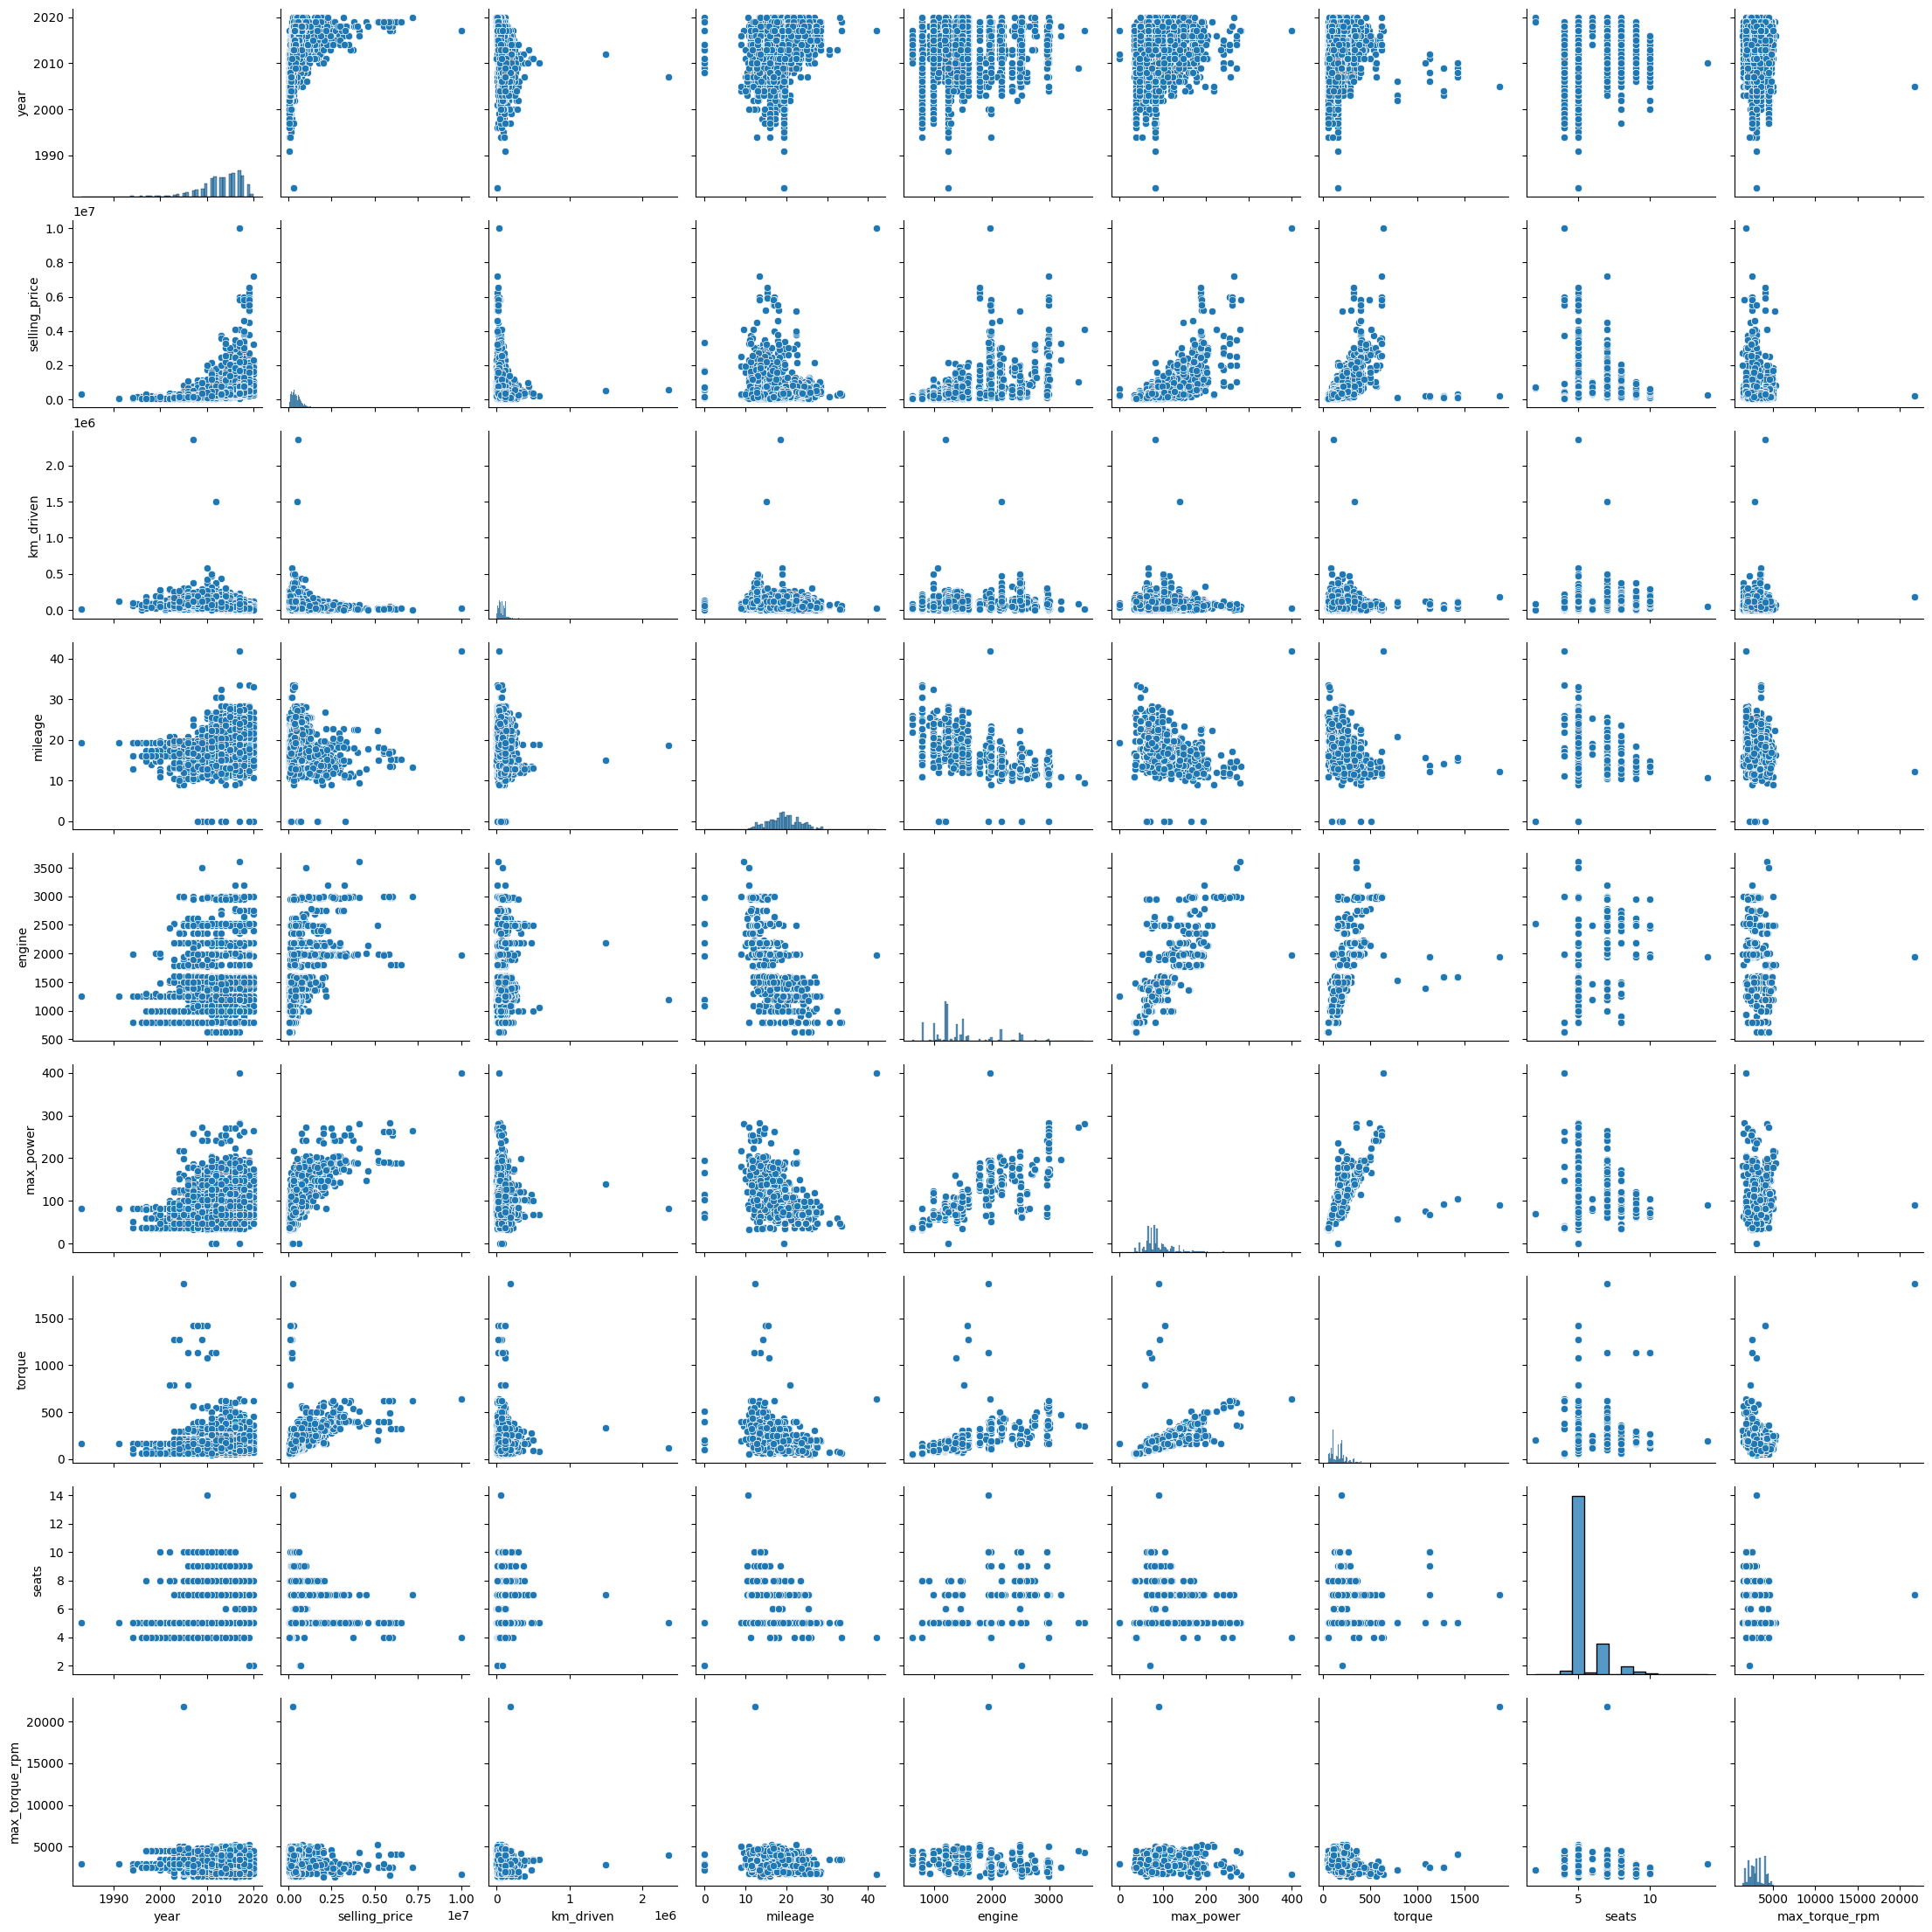

In [160]:
# Шаг 1
num_cols = df_train.select_dtypes(include=['number']).columns
sns.pairplot(df_train[num_cols])
plt.show()

Для определения связи между целевой переменной и признаками стоит посмотреть на диаграммы рассеяния. Если точки выстраиваются в восходящую линию, то можно говорить о прямой связи (например `selling_price` и `max_power`). Если точки выстраиваются в нисходящую линию, то можно говорить об обратной связи (например `selling_price` и `km_given`).
Аналогично для предположений о корреляции признаков между собой. Например, объем двигателя автомобиля `engine` прямо связян с максимальной мощность `max_power`, и это действительно логично - чем больше объем автомобиля, тем он мощнее.

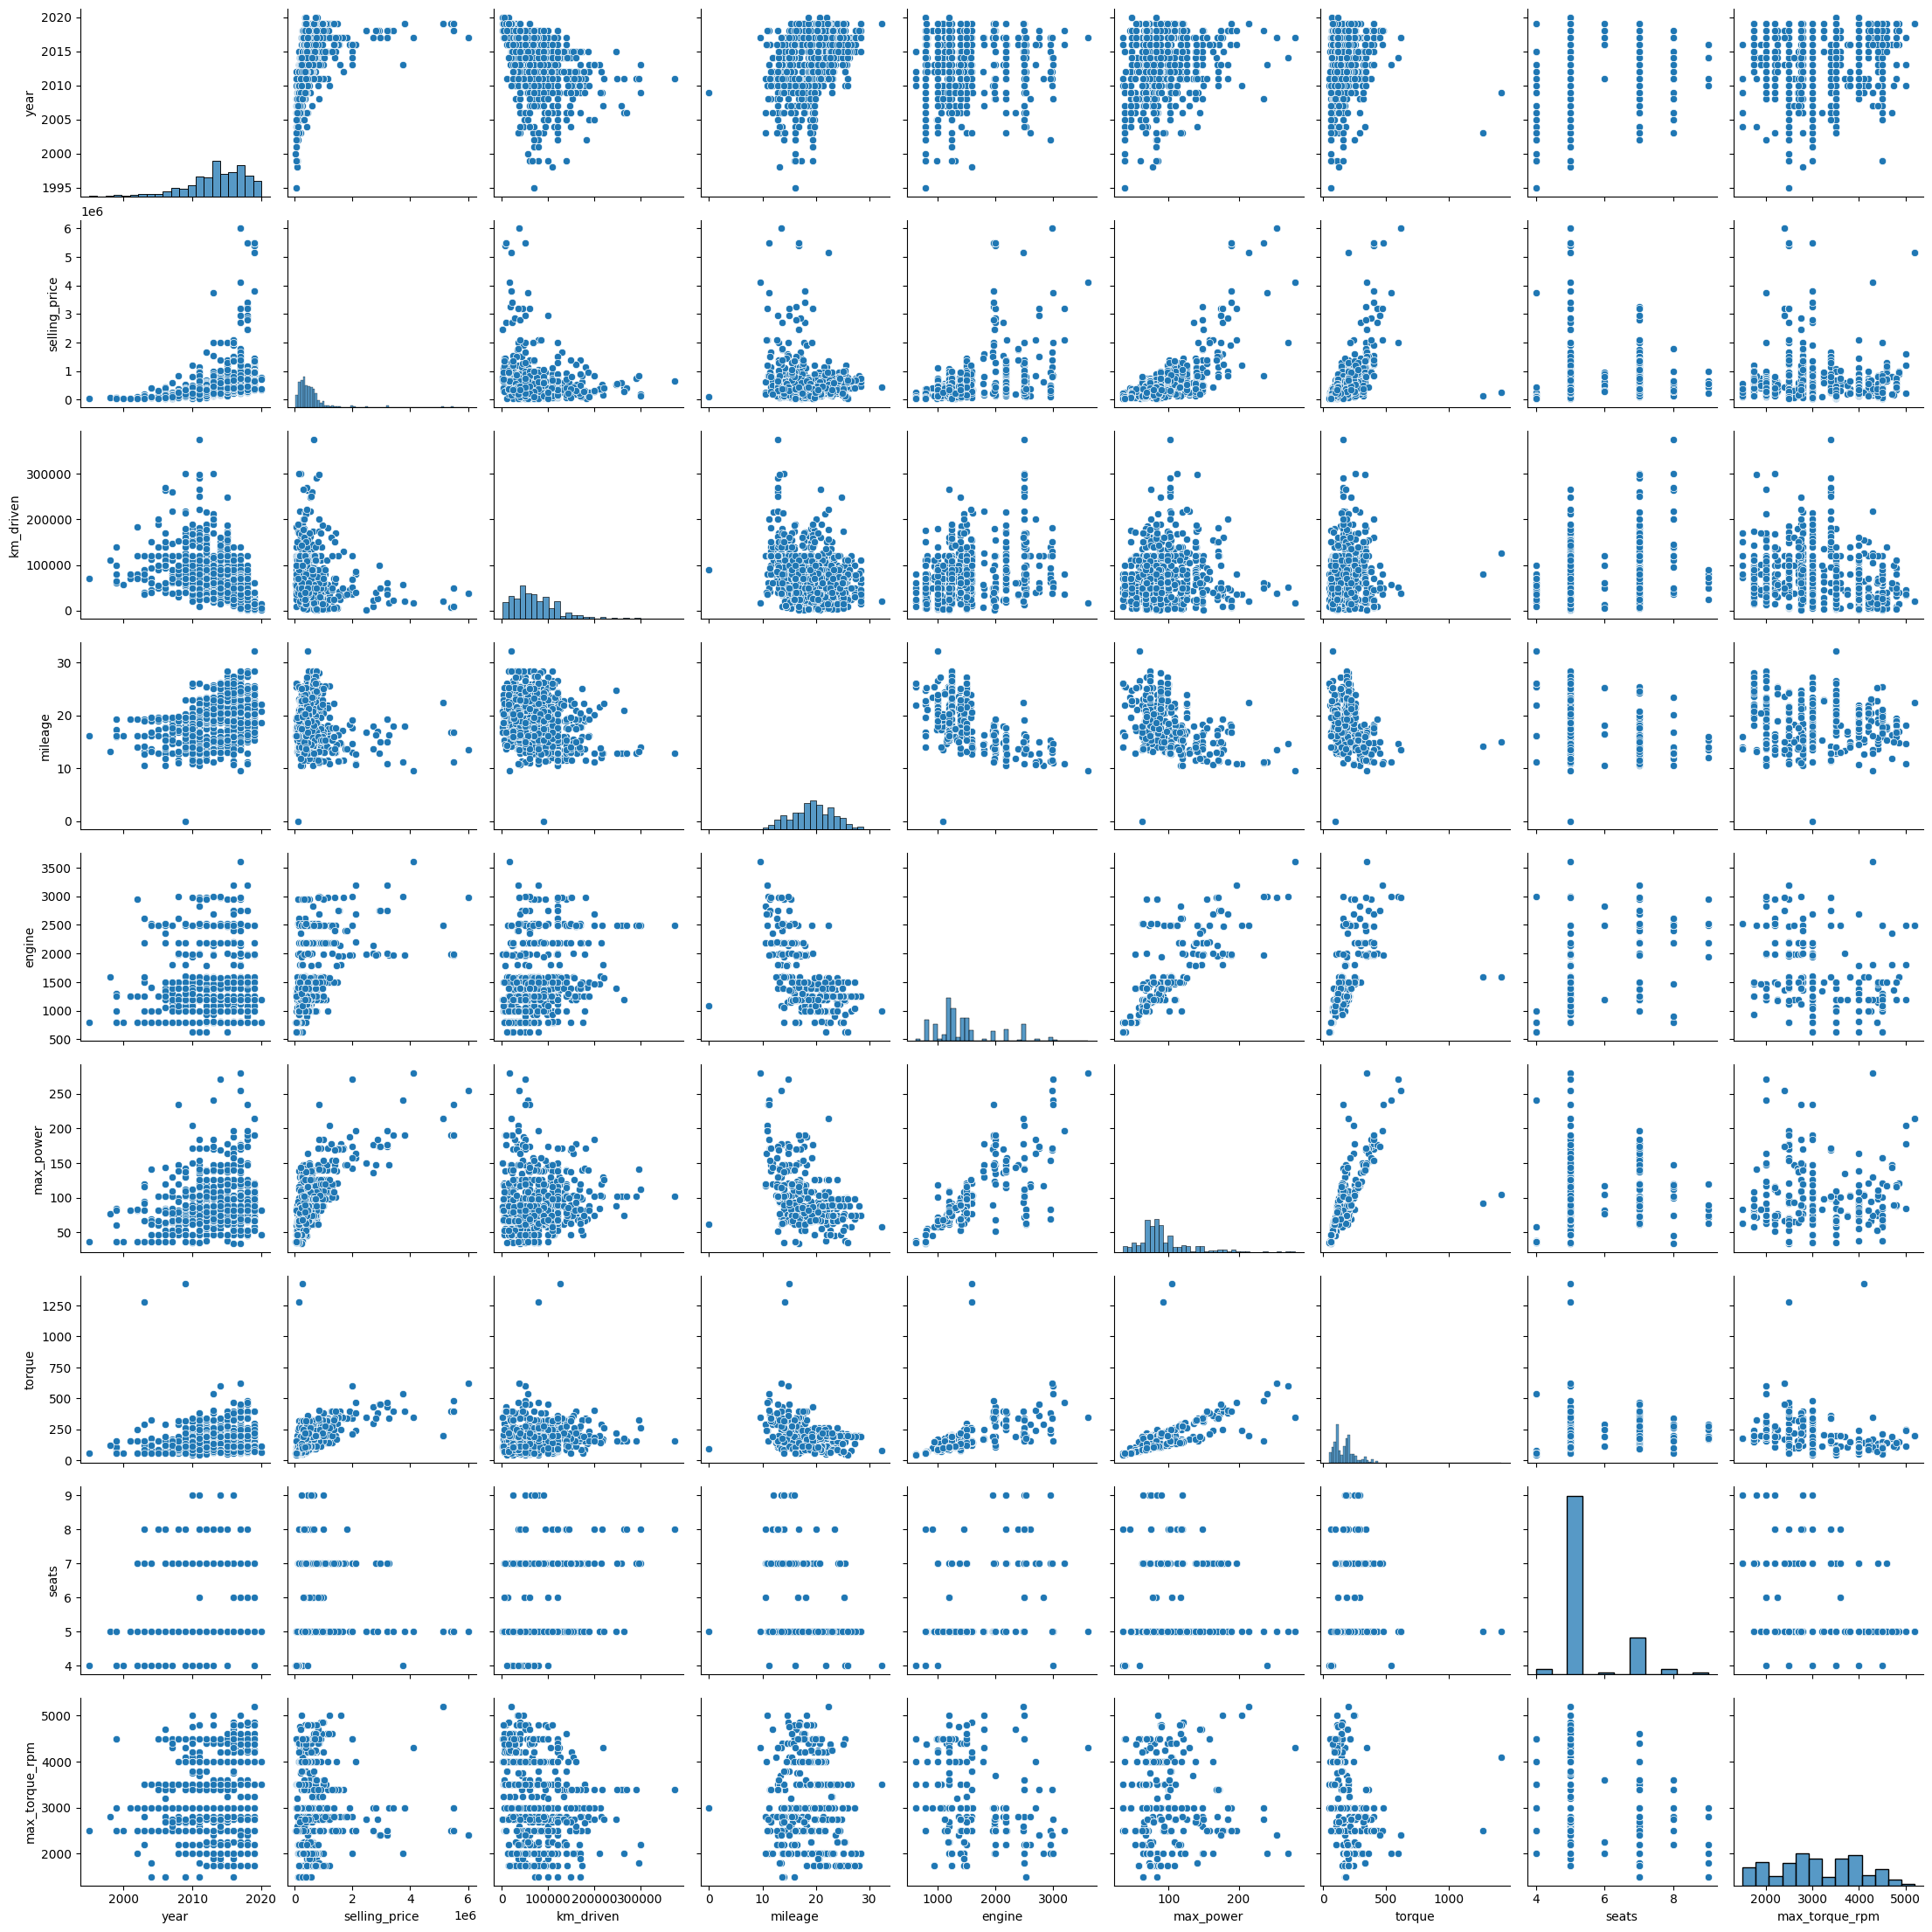

In [161]:
# Шаг 2
sns.pairplot(df_test[num_cols])
plt.show()

В целом графики оказались схожими между train и test с точки зрения зависимостей между признаками. Однако заметно, что для тестовых данных некоторые графики получились менее сплющенными (например, для `max_torque_rpm`, `km_driven`), а диагональные гистограммы более читабельными. Это связано с наличием выбросов в train наборе, которые растягивают графики, делая их порой менее интерпретируемыми.

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [X] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [X] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

Так как в предыдущем занятии мы расценивали только числовые признаки, то при построении матриц корреляций будем также оценивать только числовые колонки.

In [162]:
# Матрица корреляций
corr_matrix = df_train[num_cols].corr()
print(corr_matrix)

                    year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price   0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven      -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage         0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine          0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power       0.156858       0.692814   0.024588 -0.373390  0.681117   
torque          0.064944       0.467041   0.102888 -0.225818  0.585959   
seats           0.041178       0.149953   0.192328 -0.451059  0.652172   
max_torque_rpm  0.049358      -0.088281  -0.205498 -0.178920 -0.246786   

                max_power    torque     seats  max_torque_rpm  
year             0.156858  0.064944  0.041178        0.049358  
selling_price    0.692814  0.467041  0.149953       -0.088281  
km_driven        0.024588  0.102888  0.192328       -0.205498  
mil

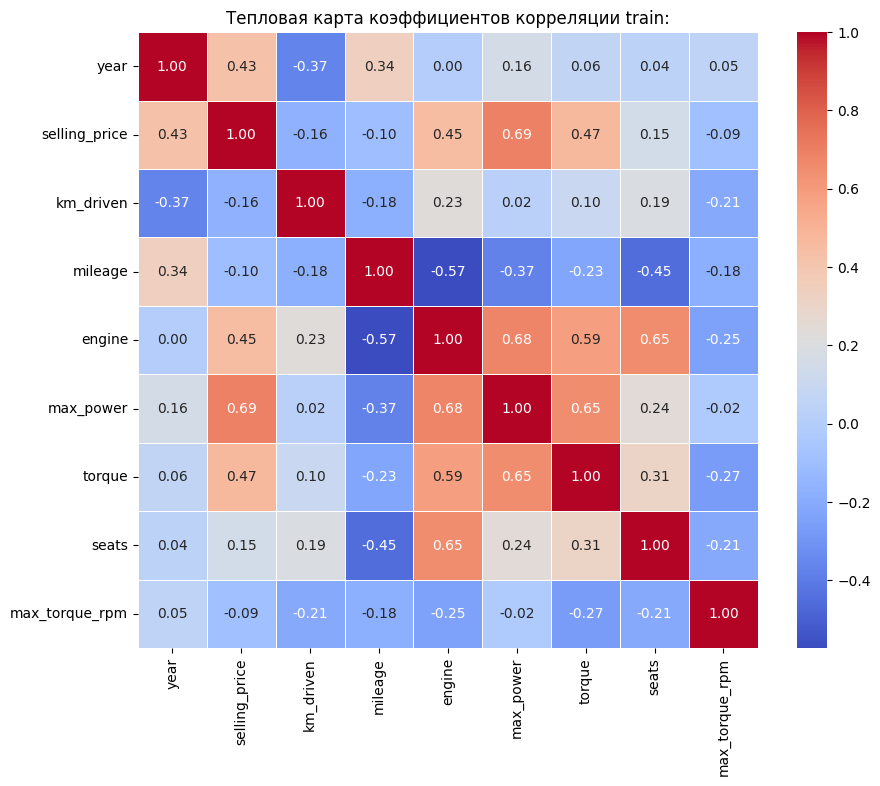

In [163]:
# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта коэффициентов корреляции train:')
plt.show()

- [X] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?



1.   Наименее скоррелированы между собой признаки `year` и `engine`, коэффициент округлен до $0$.
2.   Положительная линейная зависимость наблюдается между признаками: `selling_price` и `max_power`, `max_power` и `engine`, `max_power` и `torque`, `engine` и `seats`. В целом, все соответствует законам логики.
3.   Значение коэффициента корреляции между `year` и `km_given` равно $-0.37$, что действительно говорит о достаточной отрицательной корреляции. Поэтому можем утверждать.



### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [X] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [X] Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [ ] Проинтерпретируйте результаты


                    year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.705060  -0.566218  0.342960 -0.034677   
selling_price   0.705060       1.000000  -0.295699  0.026164  0.461866   
km_driven      -0.566218      -0.295699   1.000000 -0.197687  0.303411   
mileage         0.342960       0.026164  -0.197687  1.000000 -0.428987   
engine         -0.034677       0.461866   0.303411 -0.428987  1.000000   
max_power       0.166875       0.612352   0.040464 -0.308684  0.711526   
torque          0.126011       0.584194   0.226531 -0.133225  0.824452   
seats           0.050485       0.220670   0.105454 -0.307221  0.361660   
max_torque_rpm  0.073323      -0.128092  -0.319206 -0.173796 -0.370888   

                max_power    torque     seats  max_torque_rpm  
year             0.166875  0.126011  0.050485        0.073323  
selling_price    0.612352  0.584194  0.220670       -0.128092  
km_driven        0.040464  0.226531  0.105454       -0.319206  
mil

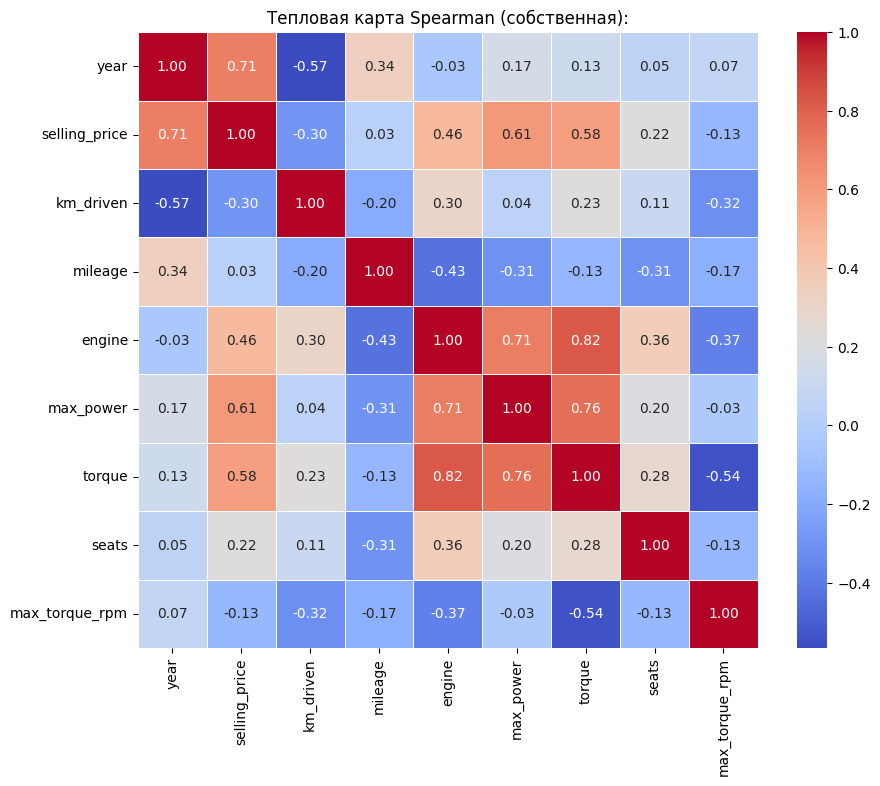

In [164]:
# Корреляция Спирмена
def spearman_corr(x, y):
  rank_x = np.argsort(np.argsort(x))
  rank_y = np.argsort(np.argsort(y))

  mean_x = np.mean(rank_x)
  mean_y = np.mean(rank_y)

  # Числитель коэффициента
  num = np.sum((rank_x - mean_x) * (rank_y - mean_y))
  # Знаменатель коэффициента
  den = np.sqrt(np.sum((rank_x - mean_x)**2) * np.sum((rank_y - mean_y)**2))

  return num / den


features = len(num_cols)
spearman_matrix = np.zeros((features, features))

# Заполнение матрицы корреляций
for i, col1 in enumerate(num_cols):
  for j, col2 in enumerate(num_cols):
    spearman_matrix[i, j] = spearman_corr(df_train[col1].values, df_train[col2].values)

spearman_df = pd.DataFrame(spearman_matrix, index=num_cols, columns=num_cols)
print(spearman_df)

plt.figure(figsize=(10, 8))
sns.heatmap(spearman_df, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта Spearman (собственная):')
plt.show()

                    year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.707123  -0.569659  0.346132 -0.038056   
selling_price   0.707123       1.000000  -0.295665  0.026186  0.463577   
km_driven      -0.569659      -0.295665   1.000000 -0.198466  0.304504   
mileage         0.346132       0.026186  -0.198466  1.000000 -0.429871   
engine         -0.038056       0.463577   0.304504 -0.429871  1.000000   
max_power       0.165798       0.612258   0.040919 -0.308824  0.713113   
torque          0.123849       0.584201   0.227757 -0.132973  0.826655   
seats           0.048291       0.317605   0.195317 -0.435458  0.527716   
max_torque_rpm  0.077408      -0.128215  -0.322711 -0.174610 -0.374776   

                max_power    torque     seats  max_torque_rpm  
year             0.165798  0.123849  0.048291        0.077408  
selling_price    0.612258  0.584201  0.317605       -0.128215  
km_driven        0.040919  0.227757  0.195317       -0.322711  
mil

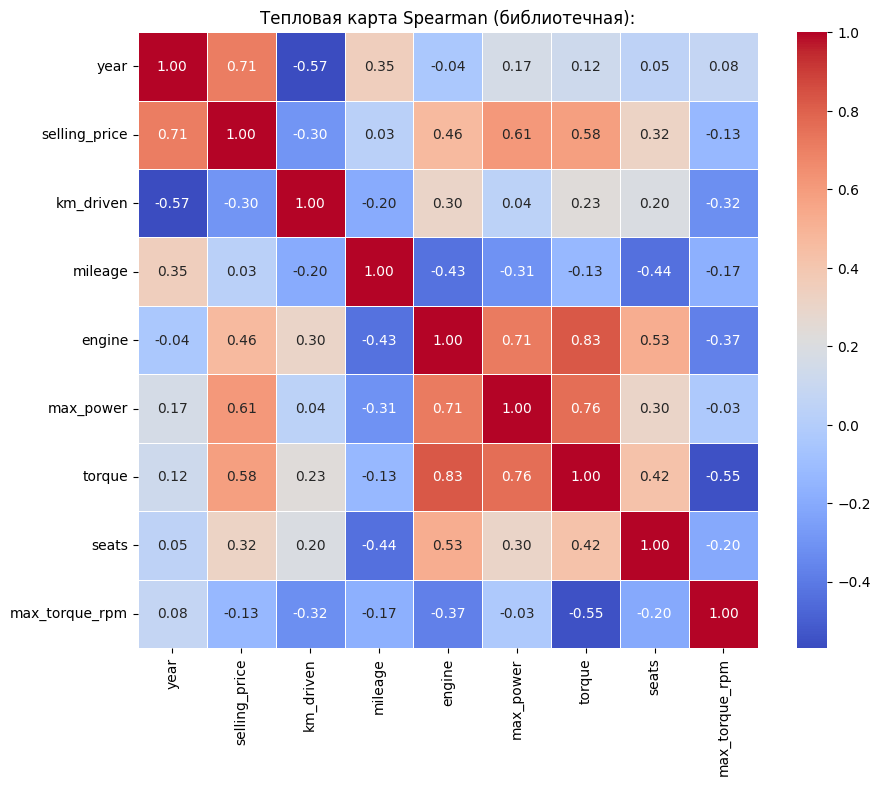

In [165]:
from scipy.stats import spearmanr

# Библиотечная реализация
lib_corr = df_train[num_cols].corr(method='spearman')
print(lib_corr)

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(lib_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта Spearman (библиотечная):')
plt.show()

Результаты собственной и библиотечной реализация хорошо совпали, только часть коэффициентов отличается на $0.01$, что вероятнее всего связано с особенностями округления чисел "под капотом". В целом все корреляции отражены идентично.

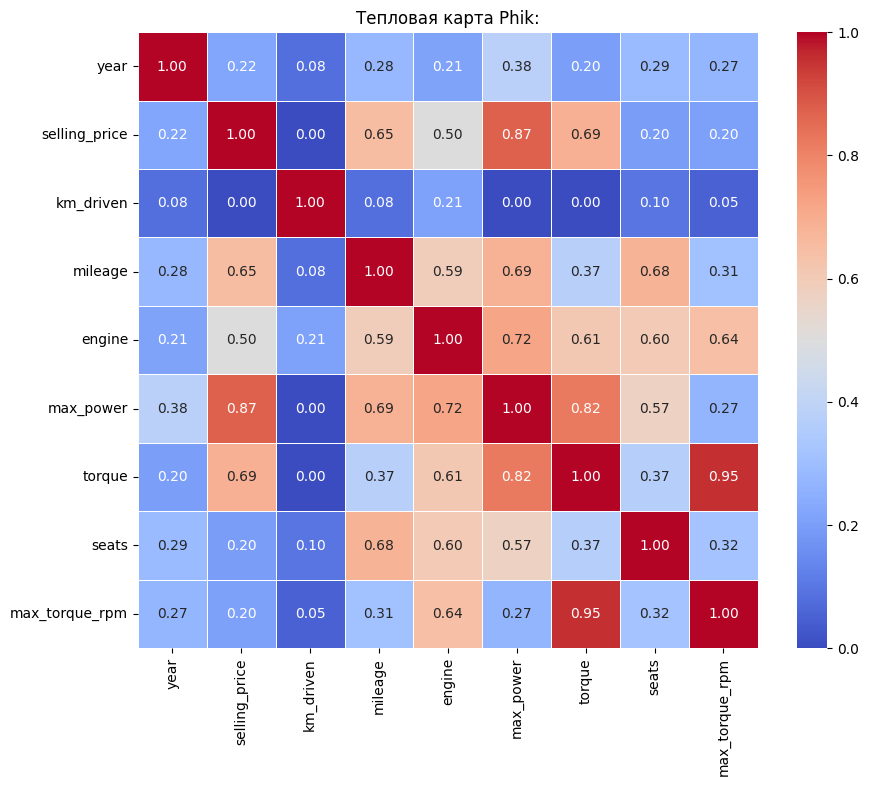

In [166]:
from phik import phik_matrix

# Вычисление корреляционной матрицы Phik
phik_matrix = df_train[num_cols].phik_matrix(interval_cols=num_cols)

# Тепловая карта
plt.figure(figsize=(10, 8))
sns.heatmap(phik_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Тепловая карта Phik:")
plt.show()

Как видим, в матрице, построенной методом `Phik`, отсутствуют отрицательные значения. Это связано с тем, что метод не фиксирует направление зависимости, а оценивает только *силу взаимосвязи*. Для каких-то пар признаков в целом корреляция совпала с реализацией Спирмена, например `selling_price` и `max_power`, `max_power` и `engine` - в положительном направлении, `max_torque_rpm` и `torque` - в отрицательном. Но есть примеры, когда результаты не совсем совпадают, например для `selling_price` и `year` в реализации `Phik` сила взаимосвязи невелика, но до этого все тепловые карты показывали явную положительную зависимость. Это связано с тем, что метод `Phik` выявляет более глубокие зависимости.

**Общий вывод:** матрицы, которые отражают степень нелинейной связи между переменными, схожи с матрицей линейных зависимостей, сохраняя идентичные знаки корреляций. Однако степени связи изменилась. Так, например, самая сильная нелинейная связь между `engine` и `torque` по Спирману, то есть между признаками очень сильная зависимость. Пирсон не так явно это отобразил. Но кажется, что `Phik` имеет больше общих тенденций с Пирсоном, чем со Спирманом.

### **Дополнительные визуализации (бонус 0.2 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

In [39]:
# your code here

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

В учебной беседе было сказано, что на данном этапе необходимо разбивать train набор (а test будет использоваться для тестирования). В связи с этим я немного переписала шаблоны кода и убрала assert'ы, которые неактуальны в рамках такого подхода.<br>
Также под тестовым набором в нашем случае корректнее подразумевать *валидационный*, поэтому наименования также изменены.

In [167]:
num_df = df_train.copy().drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'])
print(f"Размер датафрейма вещественных признаков: {num_df.shape}")
num_df.head(5)

Размер датафрейма вещественных признаков: (5840, 9)


year  selling_price  km_driven  mileage  engine  max_power   torque  seats  \
0  2014         450000     145500    23.40    1248      74.00  190.000      5   
1  2014         370000     120000    21.14    1498     103.52  250.000      5   
2  2010         225000     127000    23.00    1396      90.00  219.744      5   
3  2007         130000     120000    16.10    1298      88.20  112.815      5   
4  2017         440000      45000    20.14    1197      81.86  113.750      5   

   max_torque_rpm  
0          2000.0  
1          2500.0  
2          2750.0  
3          4500.0  
4          4000.0

In [168]:
X = num_df.drop('selling_price', axis = 1)
y = num_df['selling_price']

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
#assert X_train.shape == (5840, 6)

In [44]:
#assert X_test.shape == (1000, 6)

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [X] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [X] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание для тренировочного и тестового наборов
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

In [171]:
# Метрики R2 и MSE
print("Метрики качества для трейна:")
print(f"MSE = {MSE(y_train, y_train_pred)}")
print(f"R^2 = {r2_score(y_train, y_train_pred)}")
print()
print("Метрики качества для валидационного набора:")
print(f"MSE = {MSE(y_val, y_val_pred)}")
print(f"R^2 = {r2_score(y_val, y_val_pred)}")

Метрики качества для трейна:
MSE = 105181484956.99945
R^2 = 0.6073499273211441

Метрики качества для валидационного набора:
MSE = 158879277281.86868
R^2 = 0.5606411105463209


Мы видим, что значения $MSE$ очень большие и достигают $10^9$ порядка. Целевая переменная `selling_price` действительно имеет немалые значения, но такой высокий порядок говорит о сильной ошибке, которую допускает модель при предсказании значений цены автомобиля.<br>
Значения коэффициента $R^2$ на обоих наборах данных составляет $\approx 0.6$; это означает, что $40\%$ вариации в целевой переменной остаются необъяснёнными. Вероятнее всего это связано с линейной природой модели, которая не может учесть нелинейные зависимости между признаками.

### **Задание 13 (0.15 балла)**

- [X] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

Формула метрики:
$$R^2=1-\frac{RSS}{TSS}$$<br>
, где $RSS=\sum (y_i-\widehat {y_i})^2$ - разница между реальными значениями и предсказаниями модели;<br>
, $TSS=\sum (y_i-\bar{y_i})^2$ - разница между реальными значениями и их средним.<br>
В итоге получаем долю объясненной вариации целевой переменной.

In [172]:
def r2_manual(y_true, y_pred):
  rss = np.sum((y_true - y_pred) ** 2)
  tss = np.sum((y_true - np.mean(y_true)) ** 2)

  return 1 - (rss / tss)

In [173]:
print("Cобственная реализация r^2:")
print(f"Train = {r2_manual(y_train, y_train_pred)}")
print(f"Test = {r2_manual(y_val, y_val_pred)}")

Cобственная реализация r^2:
Train = 0.6073499273211441
Test = 0.5606411105463209


Пользовательская реализация выдала результат, аналогичный библиотечным функциям.

### **Бонус (0.15 балла)**

- [X] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [X] Объясните, когда применяется $\text{adjusted}-R^2$?

$\text{adjusted}-R^2$ - модификация коэффициента детерминации, который учитывает количество независимых переменных $p$ и размер выборки $n$.
$$\text{adjusted}-R^2=1-(1-R^2)\cdot \frac{n-1}{n-p-1}$$
Данную метрику качества полезно использовать при сравнении моделей с разным количеством предикторов. Например, если при добавлении новой переменной в модель $\text{adjusted}-R^2 < R^2,$ он является незначимым и по сути понижает эффективность модели.

In [174]:
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

In [175]:
# Расчет для train
n_samples = X_train.shape[0]
n_features = X_train.shape[1]
r2_train = r2_manual(y_train, y_train_pred)
print(f"Adjusted-r2 для train: {r2_adjusted(r2_train, n_samples, n_features)}")

Adjusted-r2 для train: 0.6066762836193575


In [176]:
# Расчет для test
n_samples = X_val.shape[0]
n_features = X_val.shape[1]
r2_val = r2_manual(y_val, y_val_pred)
print(f"Adjusted-r2 для val: {r2_adjusted(r2_val, n_samples, n_features)}")

Adjusted-r2 для val: 0.5576084348641558


В целом значения для модифицированной версии коэффициента детерминации практически идентично исходным значениям метрики. Это может быть связано с тем, что на обоих наборах кол-во предикторов невелико относительно размера выборки. Также можно предположить, что модель объясняет данные без избыточных признаков.

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [X] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [177]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_standard = scaler.transform(X_train)
X_val_standard = scaler.transform(X_val)

In [178]:
# Обучение линейной регрессии
model = LinearRegression()
model.fit(X_train_standard, y_train)

y_train_pred = model.predict(X_train_standard)
y_val_pred = model.predict(X_val_standard)

In [179]:
# Метрики R2 и MSE
print("Метрики качества для трейна:")
print(f"MSE = {MSE(y_train, y_train_pred)}")
print(f"R^2 = {r2_score(y_train, y_train_pred)}")
print()
print("Метрики качества для валидационного набора:")
print(f"MSE = {MSE(y_val, y_val_pred)}")
print(f"R^2 = {r2_score(y_val, y_val_pred)}")

Метрики качества для трейна:
MSE = 105181484956.99927
R^2 = 0.6073499273211448

Метрики качества для валидационного набора:
MSE = 158879277281.8681
R^2 = 0.5606411105463225


По итогу стандартизация практически не изменила метрики качества.

### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [X] Какой признак оказался наиболее информативным в предсказании цены?

In [180]:
features = X_train.columns
coeffs = model.coef_

print("Коэффициенты значимости признаков:")
for name, coef in zip(features, coeffs):
    print(f"{name}: {round(coef, 2)}")

Коэффициенты значимости признаков:
year: 163106.57
km_driven: -68749.24
mileage: -21166.75
engine: 44398.9
max_power: 298031.68
torque: 4718.31
seats: -36613.76
max_torque_rpm: -63338.55


Наиболее высокий коэффициент значимости по модулю имеет признак `max_power`, для которого $\beta=298031.6814$, то есть положительное направление.

Далее мы больше не будем модифицировать линейную регрессию по заданию, так что имеет смысл на данном этапе финализировать результаты по модели на итоговом тестовом наборе для дальнейшего сравнения.

In [181]:
# Отбор числовых признаков тестового набора
num_df_test = df_test.copy().drop(columns=['name', 'fuel', 'seller_type', 'transmission', 'owner'])
num_df_test.head(5)

year  selling_price  km_driven  mileage  engine  max_power  torque  seats  \
0  2010         229999     168000     14.0    2498      112.0   260.0      7   
1  2017         665000      25000     21.5    1497      108.5   260.0      5   
2  2007         175000     218463     12.9    1799      130.0   172.0      5   
3  2015         635000     173000     25.1    1498       98.6   200.0      5   
4  2011         130000      70000     16.5    1172       65.0    96.0      5   

   max_torque_rpm  
0          2200.0  
1          2750.0  
2          4300.0  
3          1750.0  
4          3000.0

In [182]:
X_test = num_df_test.drop('selling_price', axis = 1)
X_test_standard = scaler.transform(X_test)
y_test = num_df_test['selling_price']

In [183]:
y_test_pred = model.predict(X_test_standard)

print("Метрики качества для тестового набора:")
print(f"MSE = {MSE(y_test, y_test_pred)}")
print(f"R^2 = {r2_score(y_test, y_test_pred)}")

Метрики качества для тестового набора:
MSE = 232727860041.19965
R^2 = 0.5951351794228177


Таким образом, обыкновенная линейная регрессия дает на тестовом наборе среднеквадратическую ошибку в $232$ миллиарда и объяснение $60\%$ вариации целевой переменной. Выглядит, как не самая хорошая предсказательная способность...

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [X] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [X] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [184]:
from sklearn.linear_model import Lasso

# Обучение модели
lasso = Lasso()
lasso.fit(X_train_standard, y_train)

y_train_pred = lasso.predict(X_train_standard)
y_val_pred = lasso.predict(X_val_standard)

# Метрики R2 и MSE
print("Метрики качества для трейна:")
print(f"MSE = {MSE(y_train, y_train_pred)}")
print(f"R^2 = {r2_score(y_train, y_train_pred)}")
print()
print("Метрики качества для валидационного набор:")
print(f"MSE = {MSE(y_val, y_val_pred)}")
print(f"R^2 = {r2_score(y_val, y_val_pred)}")

Метрики качества для трейна:
MSE = 105181484970.89648
R^2 = 0.6073499272692655

Метрики качества для валидационного набор:
MSE = 158878613683.14526
R^2 = 0.5606429456377384


Метрики качества особо не изменились, из наиболее заметного - незначительно сократилась ошибка $MSE$ для тестового набора данных.

In [185]:
coeffs = lasso.coef_

print("Коэффициенты значимости признаков:")
for name, coef in zip(features, coeffs):
    print(f"{name}: {round(coef, 2)}")

Коэффициенты значимости признаков:
year: 163104.49
km_driven: -68748.09
mileage: -21163.37
engine: 44396.77
max_power: 298033.02
torque: 4718.01
seats: -36609.79
max_torque_rpm: -63336.28


Видим, что зануления весов не произошло и коэффициенты получились практически идентичны простой линейной регрессии. Это может быть связано с недостаточным размером выборки, когда регуляризация неспособна показать свою эффективность. Либо модель интерпретирует все признаки как значимые; в таком случае веса не зануляются.

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [X] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

**ВАЖНО:** в ходе кросс-валидации обучающая выборка сама разбивается на train и val. Поэтому резонно в нашем случае использовать исходный `df_train` в качестве обучающего. Тогда стандартизацию нужно проводит заново в том числе.

In [186]:
X_train_full = X.copy()
y_train_full = y.copy()

In [187]:
scaler = StandardScaler()
scaler.fit(X_train_full)

X_train_full_standard = scaler.transform(X_train_full)
X_test_standard = scaler.transform(X_test)

Параметры объекта `GridSearchCV`:
- `estimator`: настраиваемая модель (в нашем случае $Lasso$);
- `param_grid`: сетка гиперпараметров, по которым будет происходить перебор (в нашем случае параметр $\alpha$);
- `scoring`: метрика, которая будет максимизироваться для сравнения параметров (в нашем случае хотим минимизировать $MSE$, поэтому указываем отрицательное значение);
- `cv`: количество фолдов, на которые будут разделяться данные (по заданию нужно $10$);
- `n_jobs`: количество параллельных процессов для выполнения вычислений (будем использовать все доступные).

Так как я работаю с небольшим набором данных, то для `param_grid` выбрала только основной параметр $Lasso$ - $\alpha$, который представляет собой коэффиицент регуляризации.

In [188]:
from sklearn.model_selection import GridSearchCV


lasso = Lasso()

param_grid = {"alpha": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_full_standard, y_train_full)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='neg_mean_squared_error')

Количество моделей, которые обучит $GSCV$, равно:<br>
$\text{Кол-во комбинаций гиперпараметров}\ \times \text{cv}=6\ \times 10=60$.

In [189]:
print(f"Лучшее значение параметра alpha: {grid_search.best_params_['alpha']}")
print(f"Лучший отрицательный MSE: {round(grid_search.best_score_, 2)}")

Лучшее значение параметра alpha: 100.0
Лучший отрицательный MSE: -119356698500.54


In [190]:
lasso_best = grid_search.best_estimator_
coeffs = lasso_best.coef_

print("Коэффициенты значимости признаков:")
for name, coef in zip(features, coeffs):
    print(f"{name}: {round(coef, 2)}")

Коэффициенты значимости признаков:
year: 165175.28
km_driven: -48772.37
mileage: -7352.39
engine: 22947.53
max_power: 327014.3
torque: 10301.87
seats: -30034.14
max_torque_rpm: -56616.44


In [191]:
y_train_pred = lasso_best.predict(X_train_full_standard)

print("Метрики качества для трейна:")
print(f"MSE = {MSE(y_train_full, y_train_pred)}")
print(f"R^2 = {r2_score(y_train_full, y_train_pred)}")

Метрики качества для трейна:
MSE = 114431462306.50453
R^2 = 0.6007810296345305


Теперь финализируем результат для тестовой выборки по модели $Lasso$:

In [192]:
y_test_pred = lasso_best.predict(X_test_standard)

print("Метрики качества для тестового набора:")
print(f"MSE = {MSE(y_test, y_test_pred)}")
print(f"R^2 = {r2_score(y_test, y_test_pred)}")

Метрики качества для тестового набора:
MSE = 229816089682.29764
R^2 = 0.6002006382110785


Мы получили, что значение $MSE$ сократилось практически на $3$ миллиарда в сравнении с обычной линейной регрессией. При этом коэффициент детерминации вырос на сотые доли.

**Ваша задача 2:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [X] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [193]:
from sklearn.linear_model import ElasticNet


elastic_net = ElasticNet()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
    'l1_ratio': np.linspace(0.1, 1, 10)
}

grid_search = GridSearchCV(
    estimator=elastic_net,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_full_standard, y_train_full)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

Количество моделей, которые обучит $ElasticNet$, равно:<br>
$\text{Кол-во комбинаций гиперпараметров}\ \times \text{cv}=6\ \times 10 \ \times 10=600$.

In [194]:
print(f"Лучшее значение параметра alpha: {grid_search.best_params_['alpha']}")
print(f"Лучшее значение параметра l1_ratio: {grid_search.best_params_['l1_ratio']}")
print(f"Лучший отрицательный MSE: {round(grid_search.best_score_, 2)}")

Лучшее значение параметра alpha: 0.1
Лучшее значение параметра l1_ratio: 0.9
Лучший отрицательный MSE: -119310039475.83


In [195]:
elastic_best = grid_search.best_estimator_
y_train_pred = elastic_best.predict(X_train_full_standard)

print("Метрики качества для трейна:")
print(f"MSE = {MSE(y_train_full, y_train_pred)}")
print(f"R^2 = {r2_score(y_train_full, y_train_pred)}")

Метрики качества для трейна:
MSE = 114457925906.90327
R^2 = 0.6006887056259895


Теперь финализируем результат для тестовой выборки по модели $ElasticNet$:


In [196]:
y_test_pred = elastic_best.predict(X_test_standard)

print("Метрики качества для тестового набора:")
print(f"MSE = {MSE(y_test, y_test_pred)}")
print(f"R^2 = {r2_score(y_test, y_test_pred)}")

Метрики качества для тестового набора:
MSE = 231072255892.4962
R^2 = 0.5980153497491938


Значение $MSE$ выросло в сравнении с $Lasso$ регрессией, хотя все еще лучше, чем для обычной линейной регрессии.

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [X] Реализуйте модель с $L0$-регуляризаицей.
- [X] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициентом регуляризации
- [X] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



Данная регуляризация требует перебора всех возможных комбинаций признаков, поэтому прямая оптимизация является вычислительно затратной. Я буду реализовывать приближенный подход с использованием рекурсивного исключения признаков (Recursive Feature Elimination, RFE).<br>
Так как в данном случае без кросс-валидации, снова прибегнем при настройке коэффициента регуляризации к разделению на `train` и `val`:

In [197]:
from sklearn.feature_selection import RFE

model = LinearRegression()

# Цикл по всем возможным количествам признаков
for n_features in range(1, X.shape[1] + 1):
  rfe = RFE(estimator=model, n_features_to_select=n_features)
  rfe.fit(X_train_standard, y_train)
  # Преобразование данных
  X_train_selected = rfe.transform(X_train_standard)
  X_val_selected = rfe.transform(X_val_standard)

  # Обучение модели
  model.fit(X_train_selected, y_train)

  y_train_pred = model.predict(X_train_selected)
  y_val_pred = model.predict(X_val_selected)

  # Метрики R2 и MSE
  print(f"Количество выбранных признаков: {n_features}")
  print("Метрики качества для трейна:")
  print(f"MSE = {MSE(y_train, y_train_pred)}")
  print(f"R^2 = {r2_score(y_train, y_train_pred)}")
  print()
  print("Метрики качества для валидационного набор:")
  print(f"MSE = {MSE(y_val, y_val_pred)}")
  print(f"R^2 = {r2_score(y_val, y_val_pred)}")
  print()
  print()

Количество выбранных признаков: 1
Метрики качества для трейна:
MSE = 142128227982.08594
R^2 = 0.46942506972878306

Метрики качества для валидационного набор:
MSE = 178061243219.50793
R^2 = 0.5075960099134187


Количество выбранных признаков: 2
Метрики качества для трейна:
MSE = 111367024649.59993
R^2 = 0.5842588613331476

Метрики качества для валидационного набор:
MSE = 151810646226.38422
R^2 = 0.5801884419769999


Количество выбранных признаков: 3
Метрики качества для трейна:
MSE = 109709294334.41507
R^2 = 0.5904472882127015

Метрики качества для валидационного набор:
MSE = 153895688996.94888
R^2 = 0.5744225416543702


Количество выбранных признаков: 4
Метрики качества для трейна:
MSE = 106151500955.56964
R^2 = 0.6037287876073062

Метрики качества для валидационного набор:
MSE = 154877368139.29504
R^2 = 0.5717078423860957


Количество выбранных признаков: 5
Метрики качества для трейна:
MSE = 105867274064.71915
R^2 = 0.604789827099146

Метрики качества для валидационного набор:
MSE = 1

Как и ожидалось, с ростом коэффициента регуляризации (количества признаков, отобранных в модель) ошибка $MSE$ на тренировочных данных уменьшается, подгоняясь под данные. С валидационными данными ситуация интереснее: минимальное значение было достигнуто при двух выбранных признаках, потом значение начало расти. При этом как минимум для $2-6$ признаков значение ошибки на валидационных данных меньше, чем для $Lasso$ регрессии. Это наталкивает на мысль, что некоторые признаки могут быть избыточными несмотря на то, что $L1$ регуляризация не смогла занулить никакие коэффициенты.

Предлагаю посмотреть, какие будут метрики на тестовом наборе. Опять же, снова объединим `train` и `val` на финальном анализе качества модели:

In [198]:
model = LinearRegression()

# Цикл по всем возможным количествам признаков
for n_features in range(1, X.shape[1] + 1):
  rfe = RFE(estimator=model, n_features_to_select=n_features)
  rfe.fit(X_train_full_standard, y_train_full)
  # Преобразование данных
  X_train_selected = rfe.transform(X_train_full_standard)
  X_test_selected = rfe.transform(X_test_standard)

  # Обучение модели
  model.fit(X_train_selected, y_train_full)

  y_train_pred = model.predict(X_train_selected)
  y_test_pred = model.predict(X_test_selected)

  # Метрики R2 и MSE
  print(f"Количество выбранных признаков: {n_features}")
  print("Метрики качества для трейна:")
  print(f"MSE = {MSE(y_train_full, y_train_pred)}")
  print(f"R^2 = {r2_score(y_train_full, y_train_pred)}")
  print()
  print("Метрики качества для валидационного набор:")
  print(f"MSE = {MSE(y_test, y_test_pred)}")
  print(f"R^2 = {r2_score(y_test, y_test_pred)}")
  print()
  print()

Количество выбранных признаков: 1
Метрики качества для трейна:
MSE = 149054438790.1905
R^2 = 0.47999126828565986

Метрики качества для валидационного набор:
MSE = 280076360634.77405
R^2 = 0.5127654012878643


Количество выбранных признаков: 2
Метрики качества для трейна:
MSE = 119223937906.8015
R^2 = 0.5840614392693602

Метрики качества для валидационного набор:
MSE = 240671222328.29547
R^2 = 0.5813165160854104


Количество выбранных признаков: 3
Метрики качества для трейна:
MSE = 116941383673.6875
R^2 = 0.5920246246764151

Метрики качества для валидационного набор:
MSE = 239533724529.32175
R^2 = 0.5832953631482711


Количество выбранных признаков: 4
Метрики качества для трейна:
MSE = 114897770130.1797
R^2 = 0.599154213674228

Метрики качества для валидационного набор:
MSE = 232102580958.87762
R^2 = 0.5962229456379591


Количество выбранных признаков: 5
Метрики качества для трейна:
MSE = 114706385568.57835
R^2 = 0.5998219002185255

Метрики качества для валидационного набор:
MSE = 23033

А вот для тестовой выборки видим другой результат, нежели продемонстрировала валидационная. Значение метрик получилось наилучшим в случае максимального количества отобранных признаков, то есть всех. При этом значение ошибки $MSE$ сократилось в сравнении с лучшей версией $Lasso$ регрессии.

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [X] Предобработайте столбец `name`, чтобы избежать его удаления

In [199]:
df_train['name'].nunique()

1924

Сейчас в столбце `name` очень много категорий. Я постараюсь их сократить посредством выделения только наименования марки автомобиля. Как правило, оно идет первый словом в строке.

In [200]:
df_train['name'] = df_train['name'].str.split(' ').str[0]

In [201]:
df_train['name'].nunique()

30

Количество категорий заметно сократилось, и хотя оно все еще значительно больше, чем для прочих категориальных переменных, с ним уже можно работать без вынужденного удаления признака.

In [202]:
df_test['name'] = df_test['name'].str.split(' ').str[0]
df_test['name']

0      Mahindra
1          Tata
2         Honda
3         Honda
4          Tata
         ...   
995     Hyundai
996     Hyundai
997     Hyundai
998     Hyundai
999       Honda
Name: name, Length: 1000, dtype: object

In [78]:
#assert X_train_cat.shape == (5840, 11)

### **Задание 20 (0.1 балла)**

- [X] Закодируйте категориальные фичи и ``seats`` методом OneHot-кодирования.

Будем использовать настройку `drop='first'`, которая удаляет одну из категорий, чтобы избежать мультиколлинеарности.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

# Применяем кодирование признаков
encoded_data = encoder.fit_transform(df_train[cat_cols])
encoded_data_test = encoder.transform(df_test[cat_cols])

encoded_train = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
encoded_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(cat_cols))

In [204]:
# Формируем итоговые датасеты
df_train_encoded = pd.concat([df_train.drop(columns=cat_cols).reset_index(drop=True), encoded_train], axis=1)
df_test_encoded = pd.concat([df_test.drop(columns=cat_cols).reset_index(drop=True), encoded_test], axis=1)

In [205]:
df_train_encoded.head(5)

year  selling_price  km_driven  mileage  engine  max_power   torque  \
0  2014         450000     145500    23.40    1248      74.00  190.000   
1  2014         370000     120000    21.14    1498     103.52  250.000   
2  2010         225000     127000    23.00    1396      90.00  219.744   
3  2007         130000     120000    16.10    1298      88.20  112.815   
4  2017         440000      45000    20.14    1197      81.86  113.750   

   max_torque_rpm  name_Audi  name_BMW  ...  owner_Test Drive Car  \
0          2000.0        0.0       0.0  ...                   0.0   
1          2500.0        0.0       0.0  ...                   0.0   
2          2750.0        0.0       0.0  ...                   0.0   
3          4500.0        0.0       0.0  ...                   0.0   
4          4000.0        0.0       0.0  ...                   0.0   

   owner_Third Owner  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  \
0                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
1                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
2                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
3                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
4                0.0      0.0      1.0      0.0      0.0      0.0      0.0   

   seats_10  seats_14  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  

[5 rows x 55 columns]

In [206]:
df_test_encoded.head(5)

year  selling_price  km_driven  mileage  engine  max_power  torque  \
0  2010         229999     168000     14.0    2498      112.0   260.0   
1  2017         665000      25000     21.5    1497      108.5   260.0   
2  2007         175000     218463     12.9    1799      130.0   172.0   
3  2015         635000     173000     25.1    1498       98.6   200.0   
4  2011         130000      70000     16.5    1172       65.0    96.0   

   max_torque_rpm  name_Audi  name_BMW  ...  owner_Test Drive Car  \
0          2200.0        0.0       0.0  ...                   0.0   
1          2750.0        0.0       0.0  ...                   0.0   
2          4300.0        0.0       0.0  ...                   0.0   
3          1750.0        0.0       0.0  ...                   0.0   
4          3000.0        0.0       0.0  ...                   0.0   

   owner_Third Owner  seats_4  seats_5  seats_6  seats_7  seats_8  seats_9  \
0                0.0      0.0      0.0      0.0      1.0      0.0      0.0   
1                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
2                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
3                0.0      0.0      1.0      0.0      0.0      0.0      0.0   
4                0.0      0.0      1.0      0.0      0.0      0.0      0.0   

   seats_10  seats_14  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3       0.0       0.0  
4       0.0       0.0  

[5 rows x 55 columns]

Как видим, вместо исходных $14$ колонок вышло $55$ колонок с учетом различных категорий категориальных переменных.

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?



1.   $OHE$ нужно обучать только на train выборке. На тестовом наборе нужно использовать этот же экземпляр $encoder$, чтобы избежать утечки информации. Так как количество категорий для признаков между train и test наборами может не совпадать, нужно обрабатывать данное поведение: в своей реализации я установила параметр `handle_unknown='ignore'`, при котором неизвестные категории, не встречающиеся в `df_train`, будут игнорироваться для `df_test`.
2.   Каждый категориальный столбец кодируется набором бинарных признаков. Получается, что для фичи сумма этих признаков равна $1$, а значит одну из категорий можно линейно выразить через другие. Это приводит к мультиколлинеарности, так как появляются дополнительные зависимости между категориями. Модель может корректно интерпретировать категориальные переменные без одного столбца, так что его удаление решит проблему мультиколлинеарности, но при этом не повлияет на работу модели.
3.   Я бы ответила, что **некорректно**. Базовая категория кодируется отсутствием значений в остальных столбцах. Удаление $k$ столбцов нарушает это условие, из-за чего базовая категория может интерпретироваться некорректно. Иными словами, оставшиеся столбцы уже не полностью описывают оригинальный категориальный признак.



### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [X] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [X] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

Повторюсь, что при использовании кросс-валидации уже не требуется разбивать обучающие данные в том числе на валидационный набор, так как $GSCV$ сам выделит его. Поэтому применяем непосредственно `df_train_encoded` и `df_test_encoded`.

In [207]:
X_train_enc = df_train_encoded.drop('selling_price', axis=1)
y_train_enc = df_train_encoded['selling_price']

X_test_enc = df_test_encoded.drop('selling_price', axis=1)
y_test_enc = df_test_encoded['selling_price']

In [208]:
# Стандартизация числовых признаков (уже без seats)
num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']

medians = X_train_enc[num_cols].median()  # Это нам потребуется чуть позже в части 5...

In [209]:
scaler = StandardScaler()
scaler.fit(X_train_enc[num_cols])

X_train_enc[num_cols] = scaler.transform(X_train_enc[num_cols])
X_test_enc[num_cols] = scaler.transform(X_test_enc[num_cols])

In [210]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


ridge = Ridge()

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
    n_jobs=-1
)

grid_search.fit(X_train_enc, y_train_enc)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]}, scoring='r2')

In [211]:
print(f"Лучшее значение параметра alpha: {grid_search.best_params_['alpha']}")
print(f"Лучший коэффициент детерминации: {round(grid_search.best_score_, 2)}")

Лучшее значение параметра alpha: 1
Лучший коэффициент детерминации: 0.71


In [212]:
ridge_best = grid_search.best_estimator_
y_train_pred = ridge_best.predict(X_train_enc)
y_test_pred = ridge_best.predict(X_test_enc)

print("Метрики качества для трейн набора:")
print(f"MSE = {MSE(y_train_enc, y_train_pred)}")
print(f"R^2 = {r2_score(y_train_enc, y_train_pred)}")
print()
print("Метрики качества для тестового набора:")
print(f"MSE = {MSE(y_test_enc, y_test_pred)}")
print(f"R^2 = {r2_score(y_test_enc, y_test_pred)}")

Метрики качества для трейн набора:
MSE = 65212371218.25045
R^2 = 0.7724925019038152

Метрики качества для тестового набора:
MSE = 124423674668.02956
R^2 = 0.7835464619014342


Мы видим очень хорошее улучшение метрик качества. На тестовом наборе значение $MSE$ сократилось на $100$ миллиардов, а коэффициент детерминации увеличился на $10\%$. Это говорит о том, что добавление категориальных фичей в модель улучшило ее предсказательную способность, а значит данные признаки вносят значимый вклад в целевую переменную цены.

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Я не успела реализовать код, но вот, что я могла бы предложить для реализации:
- изменить метод кодирования признака `name`. Кажется, что $30$ категорий слишком много для $OHE$. Я бы применила $Target\ Encoding$, который по сути заменил бы названия марок средними значениями цены автомобиля. Такое кодирование сохраняет связь фичи с целевой переменной;
- как выяснилось в ходе построения `pairplot`, ряд признаков имеет выбросы (например, `km_driven`, `seats`, `max_torque_rpm`). Сама целевая переменная также имеет аномальные значения. Я бы обработала данные колонки с помощью *метода интерквартильного размаха (IQR - Interquartile Range)*.
- также соглашусь насчет внедрения нелинейных признаков, например, квадрата `year`. Нелинейная зависимость была продемонстрирована как на `pairplot`, так и в корреляционной матрице Спирмана.

In [ ]:
# your code here

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [X] Реализуйте метрику `business_metric`
- [X] Посчитайте метрику для всех обученных моделей и определите, какая лучше всего решает задачу бизнеса

In [213]:
def business_metrics(y_true, y_pred):
  # Вычисляем отклонения на всем наборе цен и прогнозов
  errors = abs(y_true - y_pred) / y_true
  return (errors <= 0.1).mean()

Будем применять функцию вычисления метрики к наилучшим вариациям моделей, которые выдал $GSCV$ по заданным в условии параметрам (кроме линейной регрессии, которую мы улучшили только стандартизацией, и $L0$ регуляризации, для которой подобрали параметры по прямому сравнению метрик на тесте для всех возможных значений коэффициента). Учтем также, какие наборы признаков были в каждой из моделей.<br>
Также отмечу, что проверять бизнес-метрику будем на итоговом тестовом наборе.

In [214]:
# Линейная регрессия
model = LinearRegression()
model.fit(X_train_full_standard, y_train_full)

y_test_pred = model.predict(X_test_standard)
print(f"Значение бизнес-метрики для LinearRegression: {business_metrics(y_test, y_test_pred)}")

Значение бизнес-метрики для LinearRegression: 0.241


In [215]:
# L1-регуляризация
lasso = Lasso(alpha=100.0)
lasso.fit(X_train_full_standard, y_train_full)

y_test_pred = lasso.predict(X_test_standard)
print(f"Значение бизнес-метрики для Lasso: {business_metrics(y_test, y_test_pred)}")

Значение бизнес-метрики для Lasso: 0.241


In [216]:
# ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.9)
elastic.fit(X_train_full_standard, y_train_full)

y_test_pred = elastic.predict(X_test_standard)
print(f"Значение бизнес-метрики для ElasticNet: {business_metrics(y_test, y_test_pred)}")

Значение бизнес-метрики для ElasticNet: 0.243


In [217]:
# L0-регуляризация
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_train_full_standard, y_train_full)

X_train_selected = rfe.transform(X_train_full_standard)
X_val_selected = rfe.transform(X_val_standard)

model.fit(X_train_selected, y_train_full)

y_test_pred = model.predict(X_test_standard)
print(f"Значение бизнес-метрики для RFE: {business_metrics(y_test, y_test_pred)}")

Значение бизнес-метрики для RFE: 0.241


In [218]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_enc, y_train_enc)

y_test_pred = ridge.predict(X_test_enc)
print(f"Значение бизнес-метрики для Ridge: {business_metrics(y_test_enc, y_test_pred)}")

Значение бизнес-метрики для Ridge: 0.305


Из всех пяти вариаций модели наибольшую бизнес-метрику имеет **$Ridge$ с категориальными переменными**, поэтому именно она лучше других решает задачу бизнеса. Хотя в целом доля предсказаний в $30\%$ не такая уж и большая. То ессть порядка $70\%$ предиктов различаются с реальной ценой на $10\%$ и более.

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [X] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [X] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



Так как у бизнеса идет разделение на недопрогноз и перепрогноз, то метрика должна быть ассиметричной. Этого можно добиться с помощью системы штрафов, как пример, для случаев недопрогноза.<br>
Будем считать разницу между предсказаниями и реальными значениями. В случае, если эта разница отрицательна (то есть предсказание меньше реальной цены $\implies$ недопрогноз), домножаем значение ошибки на некоторый коэффициент `penalty` (по сути, он должен быть установлен со стороны бизнеса, пока предположим, что недопрогноз хуже в $1.5$ раз в численном эквиваленте). Метрика будет интерпретироваться как средняя ошибка на данных с учетом регуляризации штрафов.

In [219]:
def your_business_metrics(y_true, y_pred, penalty = 1.5):
  errors = y_pred - y_true
  penalties = np.where(errors < 0, abs(errors) * penalty, abs(errors))
  return penalties.mean()

In [220]:
# Линейная регрессия
model = LinearRegression()
model.fit(X_train_full_standard, y_train_full)

y_test_pred = model.predict(X_test_standard)
print(f"Значение бизнес-метрики для LinearRegression: {round(your_business_metrics(y_test, y_test_pred), 2)}")

Значение бизнес-метрики для LinearRegression: 289690.73


In [221]:
# L1-регуляризация
lasso = Lasso(alpha=100.0)
lasso.fit(X_train_full_standard, y_train_full)

y_test_pred = lasso.predict(X_test_standard)
print(f"Значение бизнес-метрики для Lasso: {round(your_business_metrics(y_test, y_test_pred), 2)}")

Значение бизнес-метрики для Lasso: 289662.99


In [222]:
# ElasticNet
elastic = ElasticNet(alpha=0.1, l1_ratio=0.9)
elastic.fit(X_train_full_standard, y_train_full)

y_test_pred = elastic.predict(X_test_standard)
print(f"Значение бизнес-метрики для ElasticNet: {round(your_business_metrics(y_test, y_test_pred), 2)}")

Значение бизнес-метрики для ElasticNet: 289034.82


In [223]:
# L0-регуляризация
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=8)
rfe.fit(X_train_full_standard, y_train_full)

X_train_selected = rfe.transform(X_train_full_standard)
X_val_selected = rfe.transform(X_val_standard)

model.fit(X_train_selected, y_train_full)

y_test_pred = model.predict(X_test_standard)
print(f"Значение бизнес-метрики для RFE: {round(your_business_metrics(y_test, y_test_pred), 2)}")

Значение бизнес-метрики для RFE: 289690.73


In [224]:
# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_enc, y_train_enc)

y_test_pred = ridge.predict(X_test_enc)
print(f"Значение бизнес-метрики для Ridge: {round(your_business_metrics(y_test_enc, y_test_pred), 2)}")

Значение бизнес-метрики для Ridge: 212754.5


Данная метрика уже более различима в рамках пяти вариаций моделей. По итогу, **$Ridge$ с категориальными переменными** так же показывает лучший результат, так как для нее значение метрики средней ошибки заметно меньше, чем для остальных. Этот результат уже учитывает, насколько лучше модель справляется с недопрогнозами.

# **Часть 5 (3 балла) | Реализация сервиса на FastAPI**

### **Задание 25**

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллекцией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

В качестве модели для предсказания я буду использовать **$Ridge$ с категориальными переменными**, которая зарекомендовала себя лучше прочих. Также нужно исходно сохранить `.pkl` файлы для стандартизатора, кодировщика и модели. Также сохраним медианы числовых признаков, которые будут использоваться в случае поступления на вход `NaN` значения для заполнения пропусков.

In [225]:
import joblib


joblib.dump(scaler, "scaler.pkl")  # Сохраняем стандартизатор
joblib.dump(encoder, "encoder.pkl")  # Сохраняем обученный кодировщик категориальных признаков
joblib.dump(ridge, "model.pkl")  # Сохраняем обученную модель
joblib.dump(medians, "medians.pkl")  # Сохраняем медианы числовых признаков

['medians.pkl']

Ниже представлен код сервиса, но в самом ноутбуке я его не отлаживала из-за сложностей использования `uvicorn`. Так что при желании непосредственно запустить мой сервис, предлагаю воспользоваться `.py` файлом в репозитории (либо посмотреть на демку).

Стоит отметить, что для прогнозирования я реализовала три метода вместо друх, так как изначально в шаблоне представлен `predict_items` не для файлов, а для объекта `Items`. Так что фактически на вход можно подавать в том числе `json` представление нескольких объектов.

In [ ]:
import joblib
import pandas as pd
import numpy as np
import re

from fastapi import FastAPI, UploadFile
from pydantic import BaseModel
from typing import List


app = FastAPI()


# Загружаем стандартизатор и модель
scaler = joblib.load("scaler.pkl")
encoder = joblib.load("encoder.pkl")
ridge_model = joblib.load("model.pkl")
medians = joblib.load("medians.pkl")

# Класс - признаки объекта
class Item(BaseModel):
    name: str
    year: int
    #selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


# Класс - признаки списка объектов
class Items(BaseModel):
    objects: List[Item]


# Доп функция преобразования датафрейма признаков объектов в нужный формат
def preprocess_data(df: pd.DataFrame) -> pd.DataFrame:
    # Разделение признаков для корректной стандартизации / кодировки OHE
    num_cols = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'max_torque_rpm']
    cat_cols = ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']

    # Обрабатываем столбцы, как делали ранее на этапе EDA
    df['mileage'] = df['mileage'].apply(convert_to_float)
    df['engine'] = df['engine'].apply(convert_to_float)
    df['max_power'] = df['max_power'].apply(convert_to_float)

    df['seats'] = df['seats'].apply(int)
    df['engine'] = df['engine'].apply(int)

    df['name'] = df['name'].str.split(' ').str[0]
    df[['torque', 'max_torque_rpm']] = df['torque'].apply(lambda x: pd.Series(extract_torque_values(x)))

    # Заполнение пропущенных значений
    for col in num_cols:
        if col in df.columns:
            print(col)
            print(medians)
            df[col].fillna(medians[col], inplace=True)

    # Стандартизация числовых признаков
    scaled_nums = scaler.transform(df[num_cols])

    # Кодирование категориальных признаков
    encoded_cat = encoder.transform(df[cat_cols])

    # Итоговый DataFrame
    processed_df = pd.concat(
        [
            pd.DataFrame(scaled_nums, columns=num_cols, index=df.index),
            pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_cols), index=df.index)
        ],
        axis=1
    )

    return processed_df


# Метод принимает json представление признаков и выдает предсказанную стоимость
@app.post("/predict_item")
def predict_item(item: Item) -> float:
    df = pd.DataFrame([item.dict()])

    processed_df = preprocess_data(df)
    pred = ridge_model.predict(processed_df)[0]

    return round(pred, 2)


# Метод принимает список json представлений признаков и выдает предсказанные стоимости
@app.post("/predict_items")
def predict_items(items: Items) -> List[float]:
    dfs = [pd.DataFrame([item.dict()]) for item in items.objects]
    df = pd.concat(dfs, ignore_index=True)

    processed_df = preprocess_data(df)
    preds = ridge_model.predict(processed_df)

    return preds.tolist()


# Метод принимает csv-файл с признаками объектов и выдает csv-файл с предсказаниями для них
@app.post("/predict_csv")
def predict_csv(file: UploadFile):
    df = pd.read_csv(file.file, sep=";")

    processed_df = preprocess_data(df)
    preds = ridge_model.predict(processed_df)

    # +1 колонка с предсказаниями
    df["predicted_selling_price"] = preds
    res_file = "file_with_preds.csv"
    df.to_csv(res_file, index=False)

    return {"message": "Predictions added to csv", "file_path": res_file}

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 26**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете в md-файл приложить ссылку на screencast с демонстрацией

3. Просматривает ноутбук с DS частью
4. Заглядывает в код сервиса
5. Хвалит

# **Часть Благодарственная**

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

<details>
<summary><b>Что-то приятное</b></summary>

**Напоминаем, что нашем курсе действует система кото-бонусов** 🐈

На фото по ссылке — сэр кот кого-то из команды курса (преподаватель, помощник преподавателя, ассистенты).

Предлагаем вам угадать — чей это товарищ!

[Первый кот](https://ibb.co/Kz1ZRWj)

</details>